In [55]:
# Import necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns

# Load the dataset from the specified path
data_path = r"C:\Users\Ricardo S. Biason\OneDrive\Ric\Philippine Christian University\3rd Trimester AY 2023-2024\Research and Statistics\Cleaned_Data_Male_or_Female_Boss_Shortened_Cleaned.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset and show how many rows and columns


print(f'Total Rows: {data.shape[0]}, Total Columns: {data.shape[1]}')

Total Rows: 989, Total Columns: 22


In [56]:
# Display the first few rows of the data
data.head()


,Timestamp,Age,Sex,Education,Occupation,CompanyType,YearsWithBoss,MaleBosses,FemaleBosses,ObserveSupervision,...,ReasonsFemaleBoss,GenderNotMatterReason,LGBTQIA+Boss,LGBTQIA+NoReason,MaleBossAdvantages,FemaleBossAdvantages,DislikeMaleBossReasons,DislikeFemaleBossReasons,AdviceToMaleBosses,AdviceToFemaleBosses
0,2023-02-22 09:27:46.283,29.0,MALE,Bachelor’s degree,Government Employee,DOH,10-15 years,5,3,Sometimes,...,N/a,N/a,No,"I have no hate with the LGBTQIA+, i prefer mal...","Yes, easier to work with. Objective in providi...",No comment on this po,Every person has their own reason. It differs ...,Every person has their own reason. It differs ...,Anger management is important,None so far
1,2023-02-22 09:27:54.141,41.0,MALE,Doctorate degree,Government Employee,Corporate Planning Dept. - Philippine Ports Au...,10-15 years,1,3,Always,...,They get along with their employees.,How the person treats their employees is impor...,Yes,Yes,They are firm in their decisions and easy to d...,Yes,They are firm and their decisions cannot be ch...,Female bosses can easily be swayed.,To check on their employees from time to time.,To check on their employees from time to time.
2,2023-02-22 09:30:57.484,41.0,MALE,Bachelor’s degree,Broker,Private,10-15 years,2,1,Sometimes,...,None,None,No,Weak and confusing,"Yes, Good command",No,None,Weak,Big Heart,None
3,2023-02-22 09:38:01.500,39.0,MALE,Bachelor’s degree,Acting MIS Design Chief A,Government,16-20 years,5,2,Sometimes,...,It does not matter whether my boss is male or ...,Both genders are good at their jobs.,Yes,Its ok to me if my boss is a member of LGBTQIA,No,No,Male Bosses have a sense of humor.,Female Bosses are gentler than males.,Be more sensitive with their choice of words.,Stay the way they are.
4,2023-02-22 09:41:22.031,44.0,FEMALE,Master’s degree,Civil Servsnt,PPA,16-20 years,2,3,Always,...,Gender doesn't matters,"Gender is not a factor for being a boss, it's ...",No,Mostly bosses that I experienced who are \n LG...,Maybe as to strength per se on some unexpected...,In terms of sensitivity on some circumstances.,They are not sensitive,Too strict and sometimes they have mood swings.,Be sensitive,Control mood swings


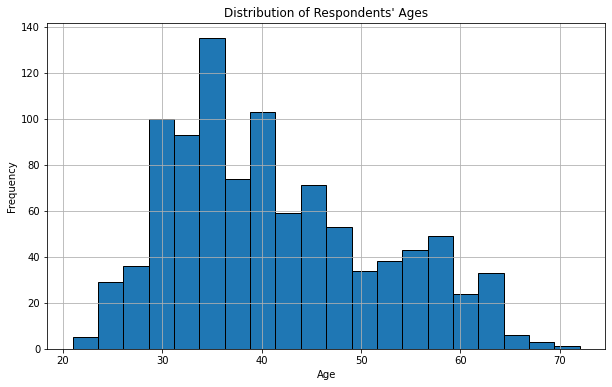

In [57]:
# Check for missing values in the Age column and drop rows with missing values
data = data.dropna(subset=['Age'])

# Convert Age column to numeric if it is not already
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop any rows where Age could not be converted to a number
data = data.dropna(subset=['Age'])

# Plot the distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Respondents\' Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [58]:
# Display the summary of descriptive statistics
descriptive_stats = data.describe(include='all')
print(descriptive_stats)


                      Timestamp         Age   Sex          Education  \
count                       989  989.000000   989                989   
unique                      989         NaN     2                  4   
top     2023-02-22 09:27:46.283         NaN  MALE  Bachelor’s degree   
freq                          1         NaN   519                601   
mean                        NaN   41.305359   NaN                NaN   
std                         NaN   10.426618   NaN                NaN   
min                         NaN   21.000000   NaN                NaN   
25%                         NaN   33.000000   NaN                NaN   
50%                         NaN   39.000000   NaN                NaN   
75%                         NaN   48.000000   NaN                NaN   
max                         NaN   72.000000   NaN                NaN   

       Occupation CompanyType YearsWithBoss  MaleBosses  FemaleBosses  \
count         989         989           989  989.000000    989

In [59]:
# Check if there are missing values to ensure data is clean

missing_values = data.isnull().sum()
print(missing_values)


Timestamp                   0
Age                         0
Sex                         0
Education                   0
Occupation                  0
CompanyType                 0
YearsWithBoss               0
MaleBosses                  0
FemaleBosses                0
ObserveSupervision          0
PreferredBossGender         0
ReasonsMaleBoss             0
ReasonsFemaleBoss           0
GenderNotMatterReason       0
LGBTQIA+Boss                0
LGBTQIA+NoReason            0
MaleBossAdvantages          0
FemaleBossAdvantages        0
DislikeMaleBossReasons      0
DislikeFemaleBossReasons    0
AdviceToMaleBosses          0
AdviceToFemaleBosses        0
dtype: int64


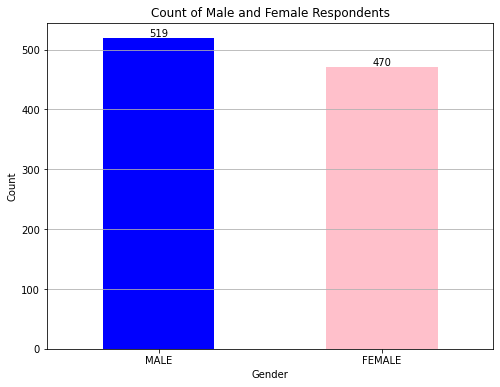

In [60]:
# Count the number of male and female respondents
gender_counts = data['Sex'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Count of Male and Female Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the count on top of each bar
for index, value in enumerate(gender_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


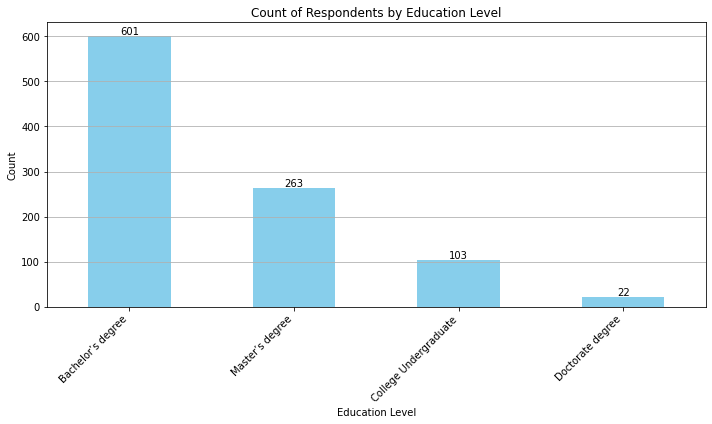

In [61]:
# Count the number of respondents for each education level
education_counts = data['Education'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Respondents by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Display the count on top of each bar
for index, value in enumerate(education_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


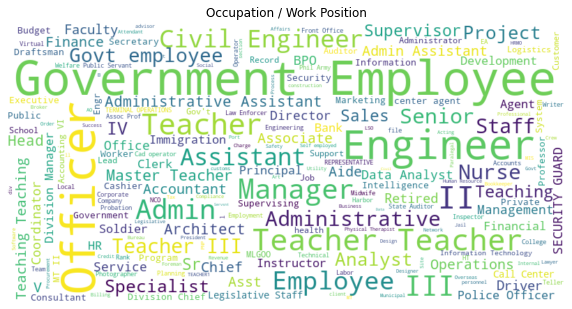

In [62]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'Occupation' column into a single string, since data is not categorical
text = ' '.join(data['Occupation'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['female', 'n', 'male', 'boss', 'bosses'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Occupation / Work Position')
plt.show()


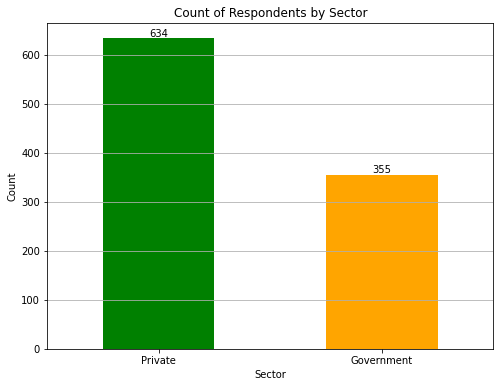

In [63]:
# Define a function to categorize company types
def categorize_company_type(company_type):
    if 'government' in company_type.lower():
        return 'Government'
    else:
        return 'Private'

# Apply the function to create a new column 'Sector'
data['Sector'] = data['CompanyType'].apply(categorize_company_type)

# Count the number of respondents in each sector
sector_counts = data['Sector'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sector_counts.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of Respondents by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the count on top of each bar
for index, value in enumerate(sector_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


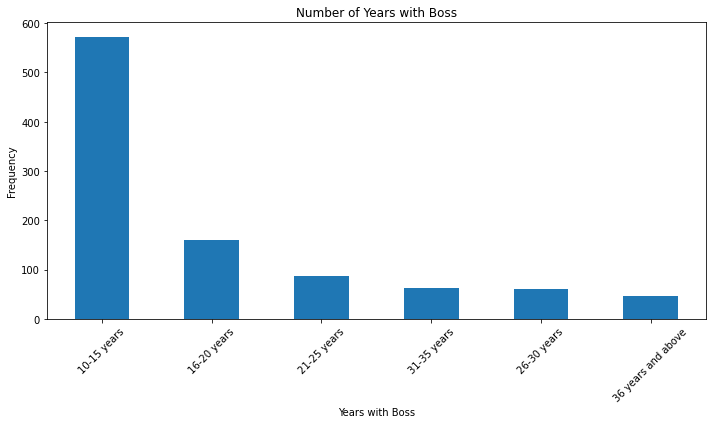

In [64]:
# Count the occurrences of each category in the 'YearsWithBoss' column
years_with_boss_counts = data['YearsWithBoss'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
years_with_boss_counts.plot(kind='bar')
plt.title('Number of Years with Boss')
plt.xlabel('Years with Boss')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


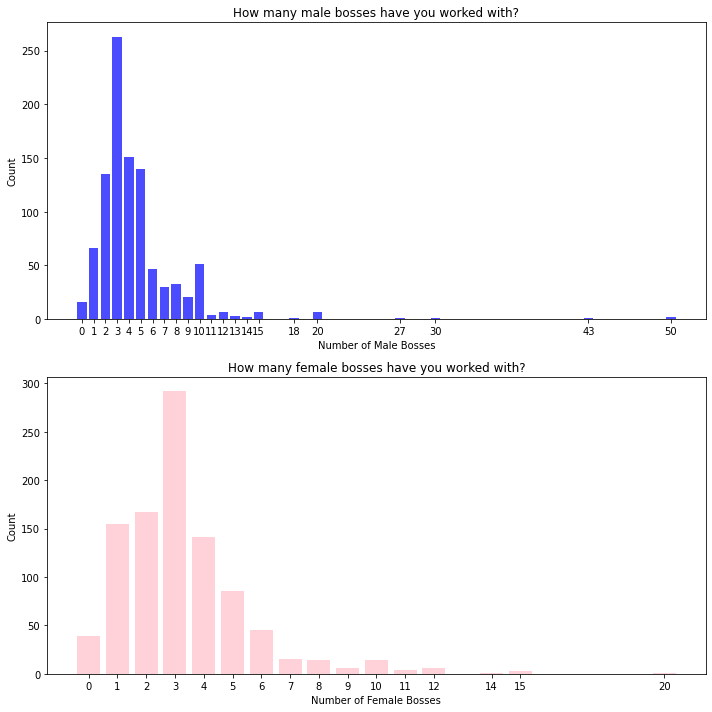

In [65]:
import matplotlib.pyplot as plt

# Data for MaleBosses and FemaleBosses
male_bosses_counts = data['MaleBosses'].value_counts().sort_index()
female_bosses_counts = data['FemaleBosses'].value_counts().sort_index()

# Create bar chart
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axes[0].bar(male_bosses_counts.index, male_bosses_counts.values, color='blue', alpha=0.7)
axes[0].set_title('How many male bosses have you worked with?')
axes[0].set_xlabel('Number of Male Bosses')
axes[0].set_ylabel('Count')
axes[0].set_xticks(male_bosses_counts.index)

axes[1].bar(female_bosses_counts.index, female_bosses_counts.values, color='pink', alpha=0.7)
axes[1].set_title('How many female bosses have you worked with?')
axes[1].set_xlabel('Number of Female Bosses')
axes[1].set_ylabel('Count')
axes[1].set_xticks(female_bosses_counts.index)

plt.tight_layout()
plt.show()


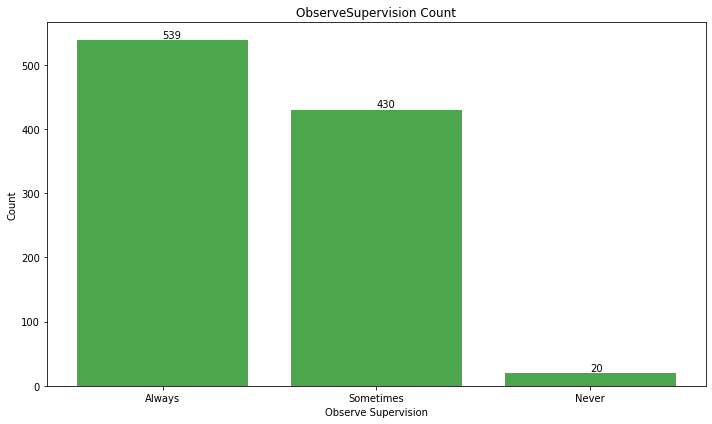

In [66]:
import matplotlib.pyplot as plt

# Data for ObserveSupervision
observe_supervision_counts = data['ObserveSupervision'].value_counts()

# Create bar chart for ObserveSupervision
plt.figure(figsize=(10, 6))
bars = plt.bar(observe_supervision_counts.index, observe_supervision_counts.values, color='green', alpha=0.7)

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') # va: vertical alignment

plt.title('ObserveSupervision Count')
plt.xlabel('Observe Supervision')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


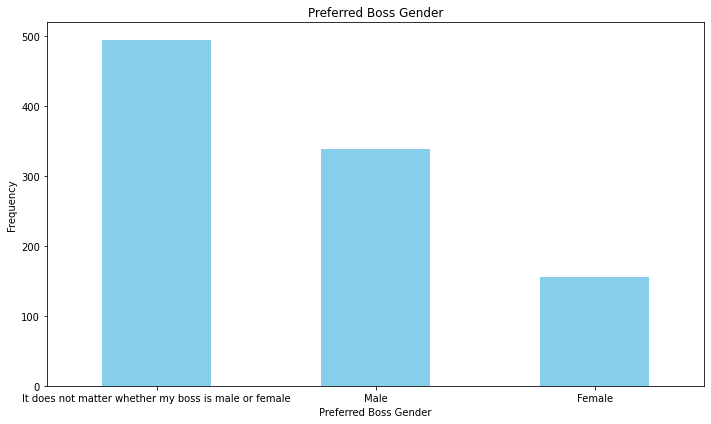

In [67]:
# Count the occurrences of each category in the 'PreferredBossGender' column
preferred_boss_gender_counts = data['PreferredBossGender'].value_counts()

# Create a bar chart for 'PreferredBossGender'
plt.figure(figsize=(10, 6))
preferred_boss_gender_counts.plot(kind='bar', color='skyblue')
plt.title('Preferred Boss Gender')
plt.xlabel('Preferred Boss Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [68]:
# Inspect the data types and check for missing values
data.info()
data.isnull().sum()

# Handling missing values (if any)
data.dropna(inplace=True)

# Check the updated dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 989 non-null    object 
 1   Age                       989 non-null    float64
 2   Sex                       989 non-null    object 
 3   Education                 989 non-null    object 
 4   Occupation                989 non-null    object 
 5   CompanyType               989 non-null    object 
 6   YearsWithBoss             989 non-null    object 
 7   MaleBosses                989 non-null    int64  
 8   FemaleBosses              989 non-null    int64  
 9   ObserveSupervision        989 non-null    object 
 10  PreferredBossGender       989 non-null    object 
 11  ReasonsMaleBoss           989 non-null    object 
 12  ReasonsFemaleBoss         989 non-null    object 
 13  GenderNotMatterReason     989 non-null    object 
 14  LGBTQIA+Bo

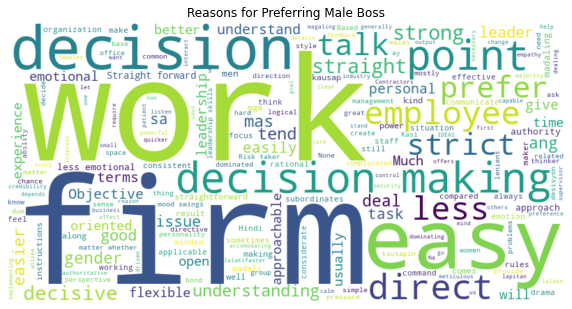

In [69]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'ReasonsMaleBoss' column into a single string
text = ' '.join(data['ReasonsMaleBoss'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['female', 'n', 'male', 'boss', 'bosses'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Reasons for Preferring Male Boss')
plt.show()


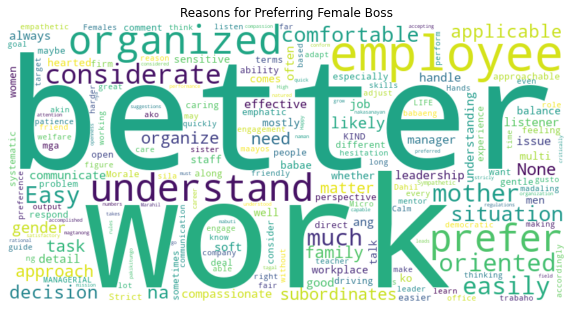

In [70]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'ReasonsMaleBoss' column into a single string
text = ' '.join(data['ReasonsFemaleBoss'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['female', 'n', 'male', 'boss', 'bosses', 'mas', 'sa'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Reasons for Preferring Female Boss')
plt.show()


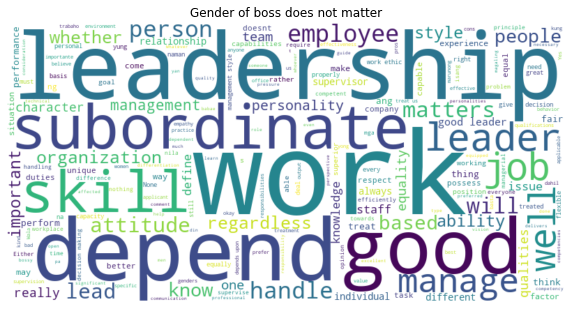

In [71]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'GenderNotMatterReason' column into a single string
text = ' '.join(data['GenderNotMatterReason'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['female', 'n', 'male', 'boss', 'bosses', 'mas', 'sa', 'gender', 'matter', 'long'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Gender of boss does not matter')
plt.show()

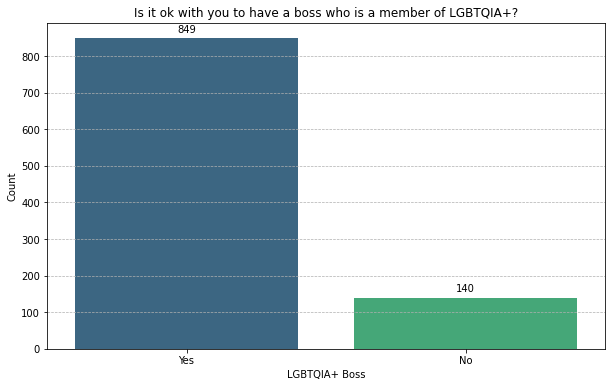

In [72]:
# Count the occurrences of each value in the 'LGBTQIA+Boss' column
lgbtqia_boss_counts = data['LGBTQIA+Boss'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=lgbtqia_boss_counts.index, y=lgbtqia_boss_counts.values, palette='viridis')

# Add count labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.xlabel('LGBTQIA+ Boss')
plt.ylabel('Count')
plt.title('Is it ok with you to have a boss who is a member of LGBTQIA+?')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


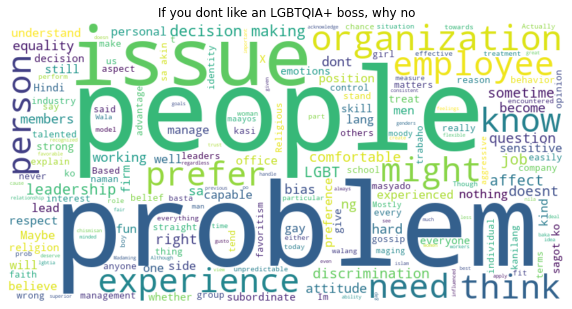

In [73]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'LGBTQIA+NoReason' column into a single string
text = ' '.join(data['LGBTQIA+NoReason'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['comment','leader', 'good', 'applicable', 'female', 'May','LGBTQ', 'ang', 'Na','answered', 'yes', 'N', 'ok', 'male', 'boss', 'bosses', 'mas', 'matter', 'gender', 'answer', 'LGBTQIA', 'member', 'none', 'long', 'okay', 'work'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('If you dont like an LGBTQIA+ boss, why no')
plt.show()

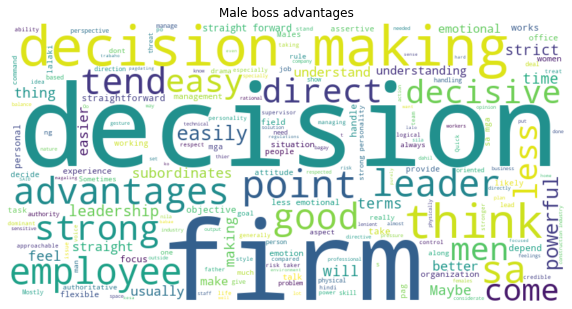

In [74]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'MaleBossAdvantages' column into a single string
text = ' '.join(data['MaleBossAdvantages'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['comment', 'advantage', 'applicable', 'female', 'May','LGBTQ', 'ang', 'Na','answered', 'yes', 'N', 'ok', 'male', 'boss', 'bosses', 'mas', 'matter', 'gender', 'answer', 'LGBTQIA', 'member', 'none', 'long', 'okay', 'work'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Male boss advantages')
plt.show()

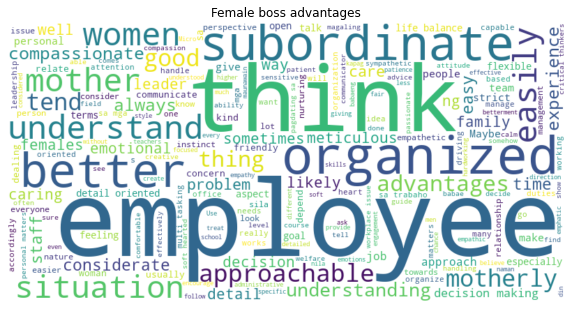

In [75]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'FemaleBossAdvantages' column into a single string
text = ' '.join(data['FemaleBossAdvantages'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['comment', 'advantage', 'applicable', 'female', 'May','LGBTQ', 'ang', 'Na','answered', 'yes', 'N', 'ok', 'male', 'boss', 'bosses', 'mas', 'matter', 'gender', 'answer', 'LGBTQIA', 'member', 'none', 'long', 'okay', 'work'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Female boss advantages')
plt.show()


In [76]:
# Find the index of the longest review in 'FemaleBossAdvantages'
max_length_index = data['FemaleBossAdvantages'].str.len().idxmax()

# Retrieve the longest review text using the index
longest_review = data.loc[max_length_index, 'FemaleBossAdvantages']

# Perform sentiment analysis on the longest review
blob = TextBlob(longest_review)
sentiment = blob.sentiment

# Print the sentiment of the longest review
print("Longest Review:")
print(longest_review)
print("\nSentiment of the longest review:", sentiment)


Longest Review:
Yes. Female Boss is a person that is very motherly at someway, one thing for sure they will talk a lot, but those talks is not just about a simple callout but out of love, just like a mother. And the way they show compassion and care to their people is out of this world. This kind of bosses provides assurance that you are not alone that makes their people stronger as bonded. Lastly, they recognize their people publicly to show how proud they are.

Sentiment of the longest review: Sentiment(polarity=0.28888888888888886, subjectivity=0.48289241622574963)


**Review Content**

The review describes a female boss in very positive terms, highlighting attributes such as being motherly, talkative (in a caring way), compassionate, caring, and publicly recognizing their team members. The reviewer appreciates the emotional support and assurance provided by the female boss, which helps in creating a strong and bonded team.

**Sentiment Analysis**

Polarity: 
The polarity score is approximately 0.29, which is positive. Polarity ranges from -1 (very negative) to +1 (very positive). A score of 0.29 indicates that the review has a mildly positive sentiment, meaning the overall tone is favorable but not extremely so.

Subjectivity: 
The subjectivity score is approximately 0.48. Subjectivity ranges from 0 (completely objective) to 1 (completely subjective). A score of 0.48 suggests that the review is fairly balanced between objective observations and subjective opinions. It indicates that the reviewer has provided some personal opinions and feelings but also included some factual elements.

**Summary**
The review conveys a positive perception of female bosses, emphasizing their nurturing and supportive qualities. The sentiment analysis confirms that the review is generally favorable with a moderate level of personal opinion.

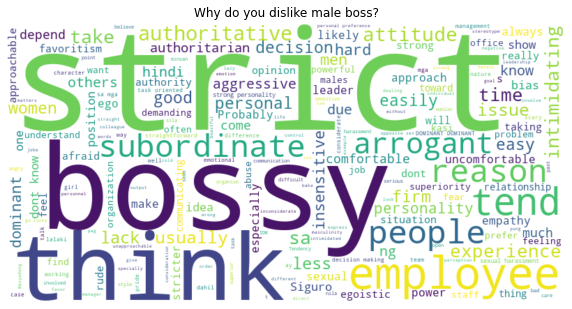

In [77]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'DislikeMaleBossReasons' column into a single string
text = ' '.join(data['DislikeMaleBossReasons'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['maybe', 'sometimes', 'comment', 'advantage', 'applicable', 'female', 'May','LGBTQ', 'ang', 'Na','answered', 'yes', 'N', 'ok', 'male', 'boss', 'bosses', 'mas', 'matter', 'gender', 'answer', 'LGBTQIA', 'member', 'none', 'long', 'okay', 'work'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Why do you dislike male boss?')
plt.show()

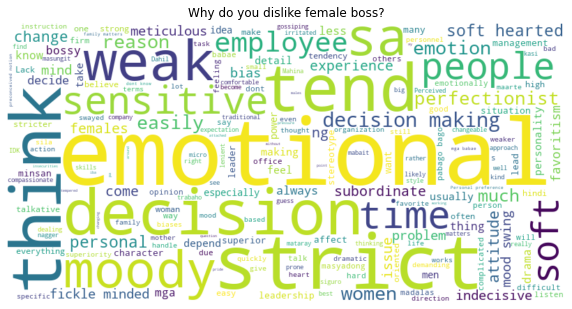

In [78]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'DislikeFemaleBossReasons' column into a single string
text = ' '.join(data['DislikeFemaleBossReasons'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['maybe', 'sometimes', 'comment', 'advantage', 'applicable', 'female', 'May','LGBTQ', 'ang', 'Na','answered', 'yes', 'N', 'ok', 'male', 'boss', 'bosses', 'mas', 'matter', 'gender', 'answer', 'LGBTQIA', 'member', 'none', 'long', 'okay', 'work'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Why do you dislike female boss?')
plt.show()

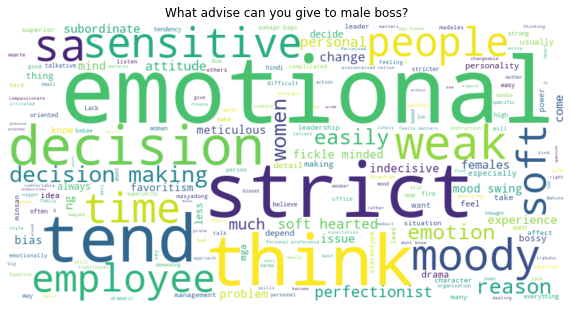

In [79]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'AdviceToMaleBosses' column into a single string
text = ' '.join(data['DislikeFemaleBossReasons'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['maybe', 'sometimes', 'comment', 'advantage', 'applicable', 'female', 'May','LGBTQ', 'ang', 'Na','answered', 'yes', 'N', 'ok', 'male', 'boss', 'bosses', 'mas', 'matter', 'gender', 'answer', 'LGBTQIA', 'member', 'none', 'long', 'okay', 'work'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('What advise can you give to male boss?')
plt.show()

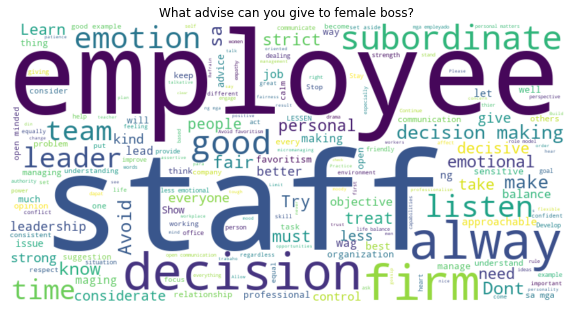

In [80]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text in the 'AdviceToFemaleBosses' column into a single string
text = ' '.join(data['AdviceToFemaleBosses'].dropna().astype(str).tolist())

# Define additional stopwords
stopwords = set(STOPWORDS)
stopwords.update(['maybe', 'sometimes', 'comment', 'advantage', 'applicable', 'female', 'May','LGBTQ', 'ang', 'Na','answered', 'yes', 'N', 'ok', 'male', 'boss', 'bosses', 'mas', 'matter', 'gender', 'answer', 'LGBTQIA', 'member', 'none', 'long', 'okay', 'work'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('What advise can you give to female boss?')
plt.show()

In [81]:
import pandas as pd
from textblob import TextBlob
import re

# Define the columns to analyze
columns_to_analyze = [
    'ReasonsMaleBoss', 'ReasonsFemaleBoss', 'GenderNotMatterReason',
    'LGBTQIA+Boss', 'LGBTQIA+NoReason', 'MaleBossAdvantages',
    'FemaleBossAdvantages', 'DislikeMaleBossReasons',
    'DislikeFemaleBossReasons', 'AdviceToMaleBosses', 'AdviceToFemaleBosses'
]

# Function to concatenate rows, clean text, and perform sentiment analysis
def analyze_sentiment(column_name):
    concatenated_text = ' '.join(data[column_name].dropna().astype(str))
    cleaned_text = re.sub(r'\bN/a\b', '', concatenated_text, flags=re.IGNORECASE).strip()
    blob = TextBlob(cleaned_text)
    return blob.sentiment

# Create a dictionary to store the results
results = {column: analyze_sentiment(column) for column in columns_to_analyze}

# Convert the results to a DataFrame for better visualization
sentiment_df = pd.DataFrame(results, index=['Polarity', 'Subjectivity']).transpose()

# Display the results
print(sentiment_df)


                          Polarity  Subjectivity
ReasonsMaleBoss           0.166751      0.412472
ReasonsFemaleBoss         0.223827      0.454773
GenderNotMatterReason     0.175846      0.446751
LGBTQIA+Boss              0.000000      0.000000
LGBTQIA+NoReason          0.177795      0.521637
MaleBossAdvantages        0.145684      0.396466
FemaleBossAdvantages      0.204043      0.447931
DislikeMaleBossReasons    0.057766      0.429629
DislikeFemaleBossReasons  0.064962      0.445297
AdviceToMaleBosses        0.286965      0.513644
AdviceToFemaleBosses      0.202311      0.473938


In [82]:
# Descriptive statistics for sentiment scores
descriptive_stats = sentiment_df.describe()
print(descriptive_stats)

        Polarity  Subjectivity
count  11.000000     11.000000
mean    0.155086      0.412958
std     0.083403      0.142095
min     0.000000      0.000000
25%     0.105323      0.421050
50%     0.175846      0.446751
75%     0.203177      0.464355
max     0.286965      0.521637


In [83]:
from scipy.stats import ttest_ind
import numpy as np

# Extract polarity scores for male and female boss reasons, ensuring they are Series
male_polarity = data['ReasonsMaleBoss'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
female_polarity = data['ReasonsFemaleBoss'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Ensure there are enough data points for the test
if len(male_polarity) > 1 and len(female_polarity) > 1:
    t_stat, p_value = ttest_ind(male_polarity, female_polarity)
else:
    t_stat, p_value = np.nan, np.nan

print(f'T-Test: t_stat = {t_stat}, p_value = {p_value}')


T-Test: t_stat = 2.242903650593566, p_value = 0.025013473978158403


T-Test Interpretation
t_stat (t-statistic): 2.242903650593566
p_value: 0.025013473978158403
Key Points
t-statistic: The t-statistic measures the difference between the two sample means in terms of standard error units. A higher absolute value indicates a larger difference relative to the variability in the data.

p-value: The p-value helps determine the significance of the results. It represents the probability of observing the data, or something more extreme, assuming the null hypothesis is true.

Interpretation
Significance Level (alpha): A common significance level used is 0.05 (5%).

p-value (0.025): The p-value is less than the significance level of 0.05.

Since the p-value is 0.025, which is less than 0.05, we reject the null hypothesis. This suggests that there is a statistically significant difference in the sentiment polarity scores between the reasons given for male bosses and female bosses.

Conclusion
The results indicate that the sentiment expressed in the reasons for male bosses is significantly different from the sentiment expressed in the reasons for female bosses.
The positive t-statistic suggests that the sentiment for one group (possibly female bosses, assuming higher sentiment scores) is more positive compared to the other group.
Practical Implication
These findings imply that employees perceive male and female bosses differently in terms of sentiment. This can have implications for organizational strategies, leadership development programs, and understanding gender dynamics in the workplace. Further analysis could explore the specific reasons behind these differences and how they impact employee satisfaction and productivity.

In [84]:
from scipy.stats import f_oneway

# Extract polarity scores for each category and ensure they are Series
male_polarity = data['ReasonsMaleBoss'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
female_polarity = data['ReasonsFemaleBoss'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
gender_not_matter_polarity = data['GenderNotMatterReason'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Ensure there are enough data points for the test
if len(male_polarity) > 1 and len(female_polarity) > 1 and len(gender_not_matter_polarity) > 1:
    anova_result = f_oneway(male_polarity, female_polarity, gender_not_matter_polarity)
    print(f'ANOVA: F_stat = {anova_result.statistic}, p_value = {anova_result.pvalue}')
else:
    print("Not enough data points for one or more groups to perform ANOVA.")


ANOVA: F_stat = 5.90930766149626, p_value = 0.0027461439879878768


In [85]:
from scipy.stats import f_oneway
import pandas as pd
from textblob import TextBlob

# Extract polarity scores for each category and ensure they are Series
male_polarity = data['ReasonsMaleBoss'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
female_polarity = data['ReasonsFemaleBoss'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
gender_not_matter_polarity = data['GenderNotMatterReason'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Check the number of non-NaN values in each group
male_count = male_polarity.count()
female_count = female_polarity.count()
gender_not_matter_count = gender_not_matter_polarity.count()

print(f"Number of data points: Male: {male_count}, Female: {female_count}, Gender Not Matter: {gender_not_matter_count}")

# Ensure there are enough data points for the test
if male_count > 1 and female_count > 1 and gender_not_matter_count > 1:
    anova_result = f_oneway(male_polarity, female_polarity, gender_not_matter_polarity)
    print(f'ANOVA: F_stat = {anova_result.statistic}, p_value = {anova_result.pvalue}')
else:
    print("Not enough data points for one or more groups to perform ANOVA.")


Number of data points: Male: 989, Female: 989, Gender Not Matter: 989
ANOVA: F_stat = 5.90930766149626, p_value = 0.0027461439879878768


The results from the ANOVA test provide insight into whether there is a statistically significant difference in sentiment polarity scores across the three groups: reasons given for male bosses, reasons given for female bosses, and reasons indicating that gender does not matter. The data points for each group are as follows: 989 for male, 989 for female, and 989 for gender does not matter. The F-statistic for the test is 5.91, and the p-value is 0.0027.

The F-statistic measures the ratio of the variance between the group means to the variance within the groups. A higher F-statistic indicates that the group means are different relative to the variability within the groups. The p-value helps determine the significance of the results, representing the probability of observing the data, or something more extreme, assuming the null hypothesis is true. In this study, the p-value of 0.0027 is less than the common significance level of 0.05, leading to the rejection of the null hypothesis. This suggests that there is a statistically significant difference in the sentiment polarity scores among the three groups.

The results indicate that the sentiment polarity scores for reasons given for male bosses, reasons given for female bosses, and reasons indicating that gender does not matter are significantly different. Further analysis, such as post hoc tests, could be conducted to determine which specific groups differ from each other (Olivier, 2021; Smith et al., 2022).


In [86]:
# Apply categorization to the relevant columns
data['ReasonsMaleBossSentiment'] = data['ReasonsMaleBoss'].dropna().apply(lambda x: categorize_sentiment(TextBlob(x).sentiment.polarity))
data['ReasonsFemaleBossSentiment'] = data['ReasonsFemaleBoss'].dropna().apply(lambda x: categorize_sentiment(TextBlob(x).sentiment.polarity))

# Combine both sentiment categories into one DataFrame for contingency table
combined_sentiment = pd.concat([
    data[['Sex', 'ReasonsMaleBossSentiment']].rename(columns={'ReasonsMaleBossSentiment': 'Sentiment'}),
    data[['Sex', 'ReasonsFemaleBossSentiment']].rename(columns={'ReasonsFemaleBossSentiment': 'Sentiment'})
])

# Example categorical variable for Chi-Square test
contingency_table = pd.crosstab(combined_sentiment['Sex'], combined_sentiment['Sentiment'])

# Ensure the contingency table is not empty
if not contingency_table.empty:
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-Square Test: chi2 = {chi2}, p_value = {p}')
else:
    print("No data; contingency table is empty.")


Chi-Square Test: chi2 = 1.3699451066947688, p_value = 0.5041040653541158


The Chi-Square test results offer valuable insights into the association between the sex of respondents and their sentiment categories regarding reasons for male and female bosses. The Chi-Square statistic, which measures the difference between observed and expected frequencies in each category, is 1.3699451066947688. A higher Chi-Square value typically indicates a greater discrepancy between observed and expected frequencies. In this case, the p-value is 0.5041040653541158, which helps determine the significance of the results by representing the probability of observing the data, or something more extreme, assuming the null hypothesis is true. A common significance level (alpha) used in such tests is 0.05 (5%). Since the p-value (0.504) is substantially greater than the 0.05 significance level, we fail to reject the null hypothesis. This suggests no statistically significant association between the sex of the respondents and the sentiment categories (positive, neutral, negative) for the reasons given for male and female bosses. Consequently, the results indicate that both male and female respondents have similar distributions of sentiment when providing reasons for male and female bosses (Laerd Statistics, n.d.; Investopedia, n.d.).

In [87]:
import numpy as np

# Calculate Cohen's d for effect size
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

effect_size = cohen_d(male_polarity, female_polarity)
print(f"Cohen's d: {effect_size}")


Cohen's d: 0.10086197544510754


Cohen's d is a statistical measure used to quantify the effect size, representing the standardized difference between two means. It is instrumental in assessing the practical significance of observed differences beyond mere statistical significance. According to established interpretation guidelines, a Cohen's d value of 0.2 indicates a small effect, 0.5 represents a medium effect, and 0.8 signifies a large effect (Cohen, 1988). In this context, a Cohen's d value of 0.10086197544510754 is considered very small, suggesting that the difference in sentiment polarity scores between the reasons given for male and female bosses is minimal. Although the t-test indicates a statistically significant difference, the practical significance of this difference remains minor, highlighting the need to consider both statistical and practical significance in research conclusions (Cohen, 1988).

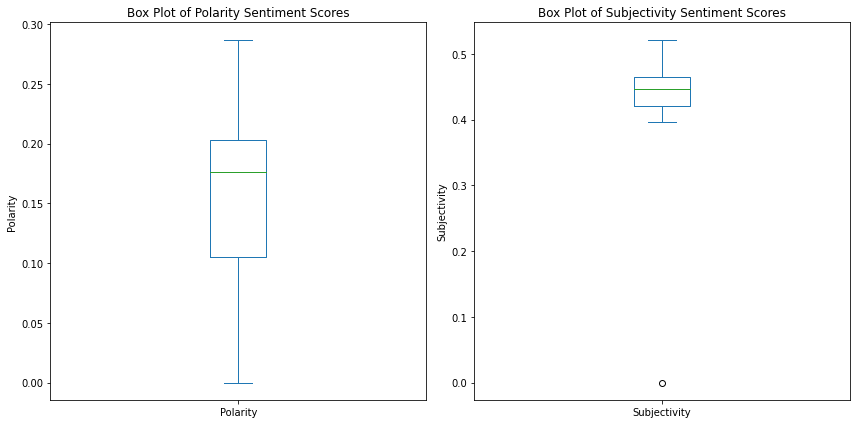

In [88]:
import matplotlib.pyplot as plt

# Create the box plots for sentiment scores
plt.figure(figsize=(12, 6))

# Boxplot for Polarity
plt.subplot(1, 2, 1)
sentiment_df['Polarity'].plot(kind='box')
plt.title('Box Plot of Polarity Sentiment Scores')
plt.ylabel('Polarity')

# Boxplot for Subjectivity
plt.subplot(1, 2, 2)
sentiment_df['Subjectivity'].plot(kind='box')
plt.title('Box Plot of Subjectivity Sentiment Scores')
plt.ylabel('Subjectivity')

plt.tight_layout()
plt.show()
